# Usando outros gráficos no Power BI com Python

### Temos 2 bibliotecas muito usadas no Python para gráficos, além da matplotlib que já conhecemos:

- Plotly
- Seaborn

Você pode usar as duas que são muito boas. Vamos usar nesse exemplo a Seaborn

### Passo 1: Recriando os dataframes que estão no Power BI

In [1]:
import pandas as pd
import os
#importando os arquivos
#caminho_padrao = r'C:\Users\joaop\Google Drive\Python Impressionador\Pyhon e Power BI'
caminho_padrao = r'C:\Users\alvar\OneDrive\00 - Dados\04 - Cursos e Treinamentos\00 - Hashtag Treinamentos\00 - Python Impressionador\Módulo 36 - Integração Python e Power BI'
vendas_df = pd.read_csv(os.path.join(caminho_padrao, r'vendas.csv'), sep=';')
produtos_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Cadastro Produtos.csv'), sep=';', encoding='ISO-8859-1')
lojas_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Lojas.csv'), sep=';', encoding='ISO-8859-1')
clientes_df = pd.read_csv(os.path.join(caminho_padrao, r'Contoso - Clientes.csv'), sep=';', encoding='ISO-8859-1')

#limpando apenas as colunas que queremos
clientes_df = clientes_df[['ID Cliente', 'E-mail']]
produtos_df = produtos_df[['ID Produto', 'Nome do Produto']]
lojas_df = lojas_df[['ID Loja', 'Nome da Loja']]

#mesclando e renomeando os dataframes
vendas_df = vendas_df.merge(produtos_df, on='ID Produto')
vendas_df = vendas_df.merge(lojas_df, on='ID Loja')
vendas_df = vendas_df.merge(clientes_df, on='ID Cliente').rename(columns={'E-mail': 'E-mail do Cliente'})
#display(vendas_df)
tres_lojas_df = vendas_df[vendas_df['ID Loja'].isin([86, 306, 172])]
tres_lojas_df['Data da Venda'] = pd.to_datetime(tres_lojas_df['Data da Venda'], format='%d/%m/%Y')
display(tres_lojas_df)

C:\Users\alvar\AppData\Local\Temp\ipykernel_22492\2622350605.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tres_lojas_df['Data da Venda'] = pd.to_datetime(tres_lojas_df['Data da Venda'], format='%d/%m/%Y')


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Nome do Produto,Nome da Loja,E-mail do Cliente
0,1,2017-01-01,02/01/2017,1,86,981,2,6825,9,1,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,2017-11-23,23/11/2017,0,306,235,10,6825,8,0,Litware Home Theater System 7.1 Channel M710 B...,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,2017-03-20,21/03/2017,1,172,376,2,6825,9,0,Adventure Works Laptop12 M1201 Silver,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
16,372597,2017-05-21,22/05/2017,1,86,981,1,21344,10,0,A. Datum Advanced Digital Camera M300 Pink,Loja Contoso Austin,makayla3@adventure-works.com
17,614980,2017-08-18,18/08/2017,0,306,1621,9,21344,4,0,Contoso DVD Movies E100 Yellow,Loja Contoso Europe Online,makayla3@adventure-works.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
970132,426980,2017-06-08,11/06/2017,3,172,1287,1,559,5,0,Contoso Genuine Leather Grip Belt E322 White,Loja Contoso Hartford,pkiddefi@globo.com
970135,688563,2017-09-17,23/09/2017,6,172,1236,3,13331,6,0,"Fabrikam Social Videographer 1"" 25mm E400 Blue",Loja Contoso Hartford,dsibbert98@senate.gov
970163,778999,2017-10-18,19/10/2017,1,172,1243,1,3459,5,0,Fabrikam Social Videographer 1'' 25mm E400 White,Loja Contoso Hartford,mpaddickcs@paypal.com
970169,815707,2017-10-30,02/11/2017,3,172,937,1,341,10,0,SV 4GB Laptop Memory M65 White,Loja Contoso Hartford,mpadfield9g@usnews.com


### Passo 2: Vamos agora criar um gráfico de linha para comparar as Vendas das 3 Lojas

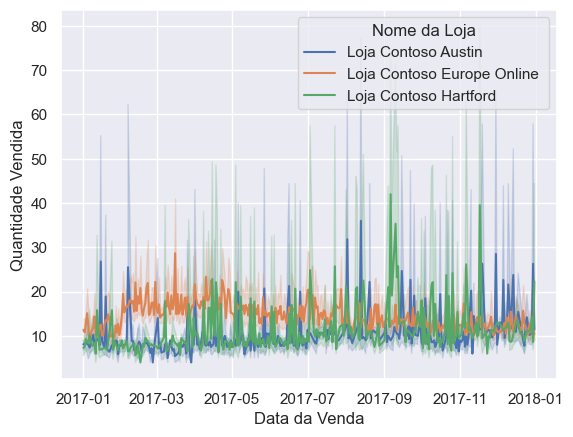

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

sns.lineplot(x="Data da Venda", y="Quantidade Vendida", hue="Nome da Loja", data=tres_lojas_df)


plt.show()